<a href="https://colab.research.google.com/github/Nguyen-Ngoc-Minh-Thu/ML2023_TV201/blob/main/BC_GK_20130421_NguyenNgocMinhThu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Đường dẫn tập dữ liệu***: https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset
# **YÊU CẦU PROJECT**

1. Mô tả dữ liệu, các thuộc tính
2. Vẽ các biểu đồ để thấy phân bố dữ liệu, các vấn đề của dữ liệu
3. Tiền xử lý dữ liệu (dữ liệu missing, feature selection, discretization, xử lý imbalanced data – nếu cần, …)
4. Lựa chọn thuật toán (ít nhất 4 thuật toán): Neural network, SVM, kNN, Naïve Bayes, RandomForest, Decision Tree
5. So sánh kết quả các thuật toán dựa trên các metrics:
Accuracy, Precision, Recall, F1, Vẽ biểu đồ

# Import libraries

In [ ]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Task 1. Mô tả dữ liệu, các thuộc tính

 Dữ liệu này có thể được sử dụng để nghiên cứu về hành vi đấu giá gian lận (shill bidding), trong đó người đấu giá giả tạo mua hàng để tăng giá hoặc gian lận trong quá trình đấu giá.
 
 Tập dữ liệu chứa các cột sau:

1. Record ID: Định danh duy nhất của một bản ghi trong tập dữ liệu.

2. Auction ID: Định danh duy nhất của một phiên đấu giá.

3. Bidder ID: Định danh duy nhất của một người đấu giá.

4. Bidder Tendency: Một người đấu giá gian lận tham gia độc quyền trong các phiên đấu giá của một số ít người bán thay vì nhiều người bán khác nhau. Đây là một hành vi gian lận liên kết giữa người bán gian lận và một đồng phạm.

5. Bidding Ratio: Một người đấu giá gian lận tham gia đấu giá thường xuyên hơn để tăng giá đấu giá và thu hút các đặt cược cao hơn từ những người tham gia chính thức.

6. Successive Outbidding: Một người đấu giá gian lận liên tục đấu giá vượt mình ngay cả khi đã là người chiến thắng hiện tại để tăng giá dần dần với các tăng giá liên tục nhỏ.

7. Last Bidding: Một người đấu giá gian lận trở nên không hoạt động ở giai đoạn cuối của phiên đấu giá (hơn 90% thời gian đấu giá) để tránh chiến thắng đấu giá.

8. Auction Bids: Các phiên đấu giá có hoạt động của người đấu giá gian lận thường có số lượng đặt cược cao hơn so với số lượng đặt cược trung bình trong các phiên đấu giá đồng thời.

9. Auction Starting Price: Một người đấu giá gian lận thường đưa ra một mức giá khởi điểm nhỏ để thu hút những người đấu giá chính thức vào phiên đấu giá.

10. Early Bidding: Một người đấu giá gian lận có xu hướng ra giá khá sớm trong phiên đấu giá (dưới 25% thời gian đấu giá) để thu hút sự chú ý của người dùng đấu giá.

11. Winning Ratio: Một người đấu giá gian lận tham gia nhiều phiên đấu giá nhưng hiếm khi chiến thắng bất kỳ phiên đấu giá nào.

12. Auction Duration: Thời gian kéo dài của một phiên đấu giá.

13. Class: 0 cho hành vi đặt cược bình thường; 1 cho trường hợp khác.

# Task 2. Vẽ các biểu đồ để thấy phân bố dữ liệu, các vấn đề của dữ liệu

In [ ]:
# code
df = pd.read_csv("Shill Bidding Dataset.csv")
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [ ]:
print(df.columns)

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


Bộ dữ liệu gồm 6321 mẫu, 13 đặc trưng

Trong đó, có 1 đặc trưng đối tượng ,8 đặc trưng kiểu float64, và 4 đặc trưng kiểu int64

Tất cả các đặc trưng đều non-null

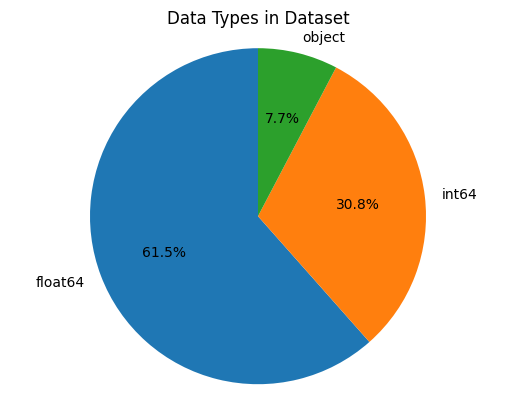

In [ ]:
# Biểu đồ thể hiện sự phân bổ của kiểu dữ liệu 
# Tính toán số lượng cột theo kiểu dữ liệu
dtype_counts = df.dtypes.value_counts()

# Tạo biểu đồ tròn thể hiện tỉ lệ các kiểu dữ liệu
plt.pie(dtype_counts, labels=dtype_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Data Types in Dataset')
plt.show()

In [ ]:
# Lấy ra danh sách tên các đặc trưng định lượng và định tính
numerical = df.iloc[:, :-1].select_dtypes(include=np.number).columns.tolist()
categorical = df.iloc[:, :-1].select_dtypes(bool).columns.tolist()

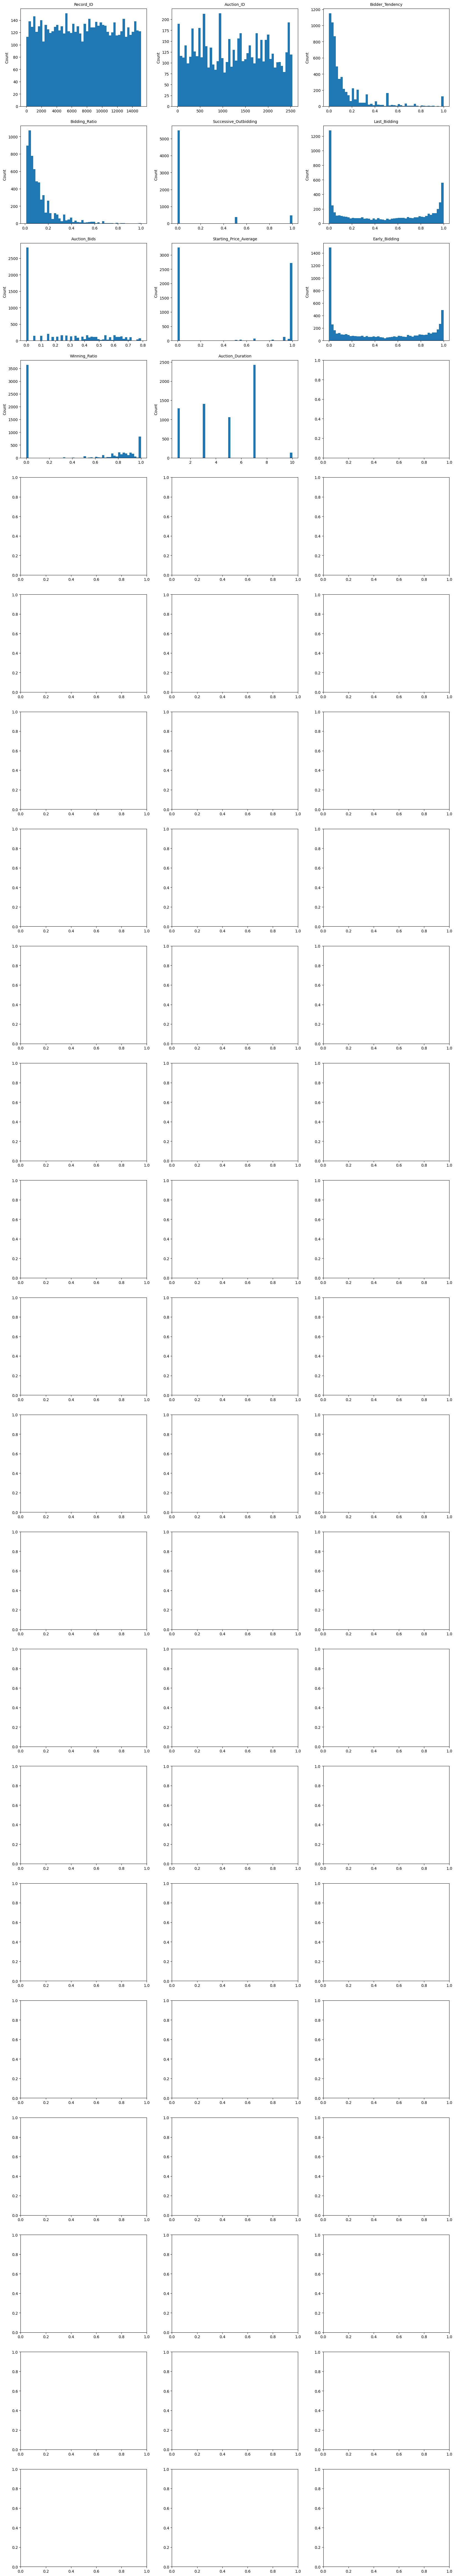

In [ ]:
# Biểu đồ histogram của 13 đặc trưng định lượng
fig, axs = plt.subplots(22, 3, figsize=(20,120))

for ax, feature in zip(axs.flat, numerical):
    ax.hist(df[feature], bins=50)
    ax.set_title(feature, fontsize=10, pad=8)
    ax.set(ylabel = 'Count')

# Task 3. Tiền xử lý dữ liệu (dữ liệu missing, feature selection, discretization, xử lý imbalanced data – nếu cần, …)

In [ ]:
#Lấy các thuộc tính có kiểu dữ liệu là object
categorical_features = df.dtypes==object
data_types_object = df.columns[categorical_features].tolist()
#Chuyển đổi
le = LabelEncoder()
for index in data_types_object:
    df[index] = le.fit_transform(df[index])

In [ ]:
#Kiểm tra lại kiểu dữ liệu của các thuộc tính
df.dtypes

Record_ID                   int64
Auction_ID                  int64
Bidder_ID                   int64
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']
# Chuẩn hóa StanderScaler cho dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Tách dữ liệu thành tập train (70%) và tập test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# Task 4. Lựa chọn thuật toán (ít nhất 4 thuật toán): Neural network, SVM, kNN, Naïve Bayes, RandomForest, Decision Tree

In [ ]:
accuracy = []
model_name = []

# **SVM**

In [ ]:
# svm
model_svm = svm.SVC(kernel='linear')

model_name.append(type(model_svm).__name__)

# Huấn luyện mô hình trên tập train
model_svm.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_svm = model_svm.predict(X_test)

acc_svm = accuracy_score(y_pred_svm, y_test)
accuracy.append(acc_svm)

pre_svm = precision_score(y_pred_svm, y_test, average='macro')

re_svm = recall_score(y_pred_svm, y_test, average='macro', zero_division=0)

f1_svm = f1_score(y_pred_svm, y_test, average='macro')

In [ ]:
print('Accuracy of SVM: ', acc_svm)
print('Precision of SVM: ', pre_svm)
print('Recall of SVM: ', re_svm)
print('F1 of SVM: ', f1_svm)

Accuracy of SVM:  0.9757511860832894
Precision of SVM:  0.9795100669071624
Recall of SVM:  0.9056219190944419
F1 of SVM:  0.9384212606204307


# **KNN**

In [ ]:
scores = []
for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append((n, cv_scores.mean()))

for n, score in scores:
    print(f"n_neighbors = {n}, mean accuracy = {score}")

best_n_neighbors = max(scores, key=lambda x: x[1])[0]
print(f"\nBest n_neighbors: {best_n_neighbors}")

n_neighbors = 1, mean accuracy = 0.9796546258659917
n_neighbors = 2, mean accuracy = 0.9769425058158857
n_neighbors = 3, mean accuracy = 0.9812380806299051
n_neighbors = 4, mean accuracy = 0.9801076258404274
n_neighbors = 5, mean accuracy = 0.9821422910754916
n_neighbors = 6, mean accuracy = 0.9794296597387324
n_neighbors = 7, mean accuracy = 0.9810118362860137
n_neighbors = 8, mean accuracy = 0.9792041823248205
n_neighbors = 9, mean accuracy = 0.9798821484265152
n_neighbors = 10, mean accuracy = 0.9785259605797991

Best n_neighbors: 5


In [ ]:
# knn
model_knn = KNeighborsClassifier(best_n_neighbors)

model_name.append(type(model_knn).__name__)

# Huấn luyện mô hình trên tập train
model_knn.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_knn = model_knn.predict(X_test)

acc_knn = accuracy_score(y_pred_knn, y_test)

pre_knn = precision_score(y_pred_knn, y_test, average='macro')

re_knn = recall_score(y_pred_knn, y_test, average='macro', zero_division=0)

f1_knn = f1_score(y_pred_knn, y_test, average='macro')

In [ ]:
print('Accuracy of KNN: ', acc_knn)
print('Precision of KNN: ', pre_knn)
print('Recall of KNN: ', re_knn)
print('F1 of KNN: ', f1_knn)

Accuracy of KNN:  0.9762783342119136
Precision of KNN:  0.9494003021613788
Recall of KNN:  0.9238488783943329
F1 of KNN:  0.9361323903387194


# **Neural Network**

In [ ]:
model_neural = Sequential()
model_name.append(type(model_neural).__name__)

model_neural.add(Dense(64, input_dim=12, activation='relu'))
model_neural.add(Dropout(0.2))
model_neural.add(Dense(32, activation='relu'))
model_neural.add(Dropout(0.2))
model_neural.add(Dense(16, activation='relu'))
model_neural.add(Dropout(0.2))
model_neural.add(Dense(1, activation='sigmoid'))

#complite
model_neural.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train
model_neural.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
70/70 [==============================] - 2s 6ms/step - loss: 0.3387 - accuracy: 0.8592 - val_loss: 0.1027 - val_accuracy: 0.9642
Epoch 2/30
70/70 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9659 - val_loss: 0.0559 - val_accuracy: 0.9742
Epoch 3/30
70/70 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9749 - val_loss: 0.0554 - val_accuracy: 0.9752
Epoch 4/30
70/70 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9769 - val_loss: 0.0510 - val_accuracy: 0.9758
Epoch 5/30
70/70 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9794 - val_loss: 0.0539 - val_accuracy: 0.9763
Epoch 6/30
70/70 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.9808 - val_loss: 0.0523 - val_accuracy: 0.9763
Epoch 7/30
70/70 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9799 - val_loss: 0.0501 - val_accuracy: 0.9768
Epoch 8/30
70/70 [==

In [ ]:
score = model_neural.evaluate(X_test, y_test)
print(score)

60/60 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9805
[0.04715864732861519, 0.9804955124855042]


In [ ]:
y_pred = model_neural.predict(X_test)
y_pred_neural = np.round(y_pred)

acc_neural = accuracy_score(y_pred_neural, y_test)
accuracy.append(acc_neural)

pre_neural = precision_score(y_pred_neural, y_test, average='macro')

re_neural = recall_score(y_pred_neural, y_test, average='macro', zero_division=0)

f1_neural = f1_score(y_pred_neural, y_test, average='macro')

60/60 [==============================] - 0s 1ms/step


In [ ]:
print('Accuracy of neural network: ', acc_neural)
print('Precision of neural network: ', pre_neural)
print('Recall of neural network: ', re_neural)
print('F1 of neural network: ', f1_neural)

Accuracy of neural network:  0.9804955192409067
Precision of neural network:  0.9610982641137114
Recall of neural network:  0.9348817326873753
F1 of neural network:  0.9474866320562804


# **Naïve Bayes**

In [ ]:
# naïve bayes

model_nb = GaussianNB()

model_name.append(type(model_nb).__name__)

# Huấn luyện mô hình trên tập train
model_nb.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_nb = model_nb.predict(X_test)

acc_nb = accuracy_score(y_pred_nb, y_test)
accuracy.append(acc_nb)

pre_nb = precision_score(y_pred_nb, y_test, average='macro')

re_nb = recall_score(y_pred_nb, y_test, average='macro', zero_division=0)

f1_nb = f1_score(y_pred_nb, y_test, average='macro')

In [ ]:
print('Accuracy of naïve bayes: ', acc_nb)
print('Precision of naïve bayes: ', pre_nb)
print('Recall of naïve bayes: ', re_nb)
print('F1 of naïve bayes: ', f1_nb)

Accuracy of naïve bayes:  0.9688982604111755
Precision of naïve bayes:  0.978040884284525
Recall of naïve bayes:  0.8830681425112418
F1 of naïve bayes:  0.9234015323389214


# **Random Forest**

In [ ]:
# random forest

model_random = RandomForestClassifier(n_estimators=100)

model_name.append(type(model_random).__name__)

# Huấn luyện mô hình trên tập train
model_random.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_random = model_random.predict(X_test)

acc_random = accuracy_score(y_pred_random, y_test)
accuracy.append(acc_random)

pre_random = precision_score(y_pred_random, y_test, average='macro')

re_random = recall_score(y_pred_random, y_test, average='macro', zero_division=0)

f1_random = f1_score(y_pred_random, y_test, average='macro')

In [ ]:
print('Accuracy of random forest: ', acc_random)
print('Precision of random forest: ', pre_random)
print('Recall of random forest: ', re_random)
print('F1 of random forest: ', f1_random)

Accuracy of random forest:  0.9894570374275171
Precision of random forest:  0.9894644343723984
Recall of random forest:  0.9557193135560621
F1 of random forest:  0.9718045671547731


# **Decision Tree**

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

model_name.append(type(model_tree).__name__)

# Huấn luyện mô hình trên tập train
model_tree.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_tree = model_tree.predict(X_test)

acc_tree = accuracy_score(y_pred_tree, y_test)
accuracy.append(acc_tree)

pre_tree = precision_score(y_pred_tree, y_test, average='macro')

re_tree = recall_score(y_pred_tree, y_test, average='macro', zero_division=0)

f1_tree = f1_score(y_pred_tree, y_test, average='macro')

In [ ]:
print('Accuracy of decision tree: ', acc_tree)
print('Precision of decision tree: ', pre_tree)
print('Recall of decision tree: ', re_tree)
print('F1 of decision tree: ', f1_tree)

Accuracy of decision tree:  0.9957828149710068
Precision of decision tree:  0.9883020380476675
Recall of decision tree:  0.9883020380476675
F1 of decision tree:  0.9883020380476675


# Task 5. So sánh kết quả các thuật toán dựa trên các metrics: Accuracy, Precision, Recall, F1, Vẽ biểu đồ

In [ ]:
tb = PrettyTable(['', 'Accuracy','Precision','Recall','F1'])

tb.add_row(['Neural Network',acc_neural, pre_neural, re_neural, f1_neural])
tb.add_row(['SVM', acc_svm, pre_svm, re_svm, f1_svm])
tb.add_row(['kNN', acc_knn, pre_knn, re_knn, f1_knn])
tb.add_row(['Naïve Bayes', acc_nb, pre_nb, re_nb, f1_nb])
tb.add_row(['Random Forest', acc_random, pre_random, re_random, f1_random])
tb.add_row(['Decision Tree', acc_tree, pre_tree, re_tree, f1_tree])

print(tb)

+----------------+--------------------+--------------------+--------------------+--------------------+
|                |      Accuracy      |     Precision      |       Recall       |         F1         |
+----------------+--------------------+--------------------+--------------------+--------------------+
| Neural Network | 0.9804955192409067 | 0.9681142663336725 | 0.9303484772897345 | 0.9481848952277601 |
|      SVM       | 0.9757511860832894 | 0.9795100669071624 | 0.9056219190944419 | 0.9384212606204307 |
|      kNN       | 0.9762783342119136 | 0.9494003021613788 | 0.9238488783943329 | 0.9361323903387194 |
|  Naïve Bayes   | 0.9688982604111755 | 0.978040884284525  | 0.8830681425112418 | 0.9234015323389214 |
| Random Forest  | 0.9894570374275171 | 0.9894644343723984 | 0.9557193135560621 | 0.9718045671547731 |
| Decision Tree  | 0.9957828149710068 | 0.9883020380476675 | 0.9883020380476675 | 0.9883020380476675 |
+----------------+--------------------+--------------------+-------------

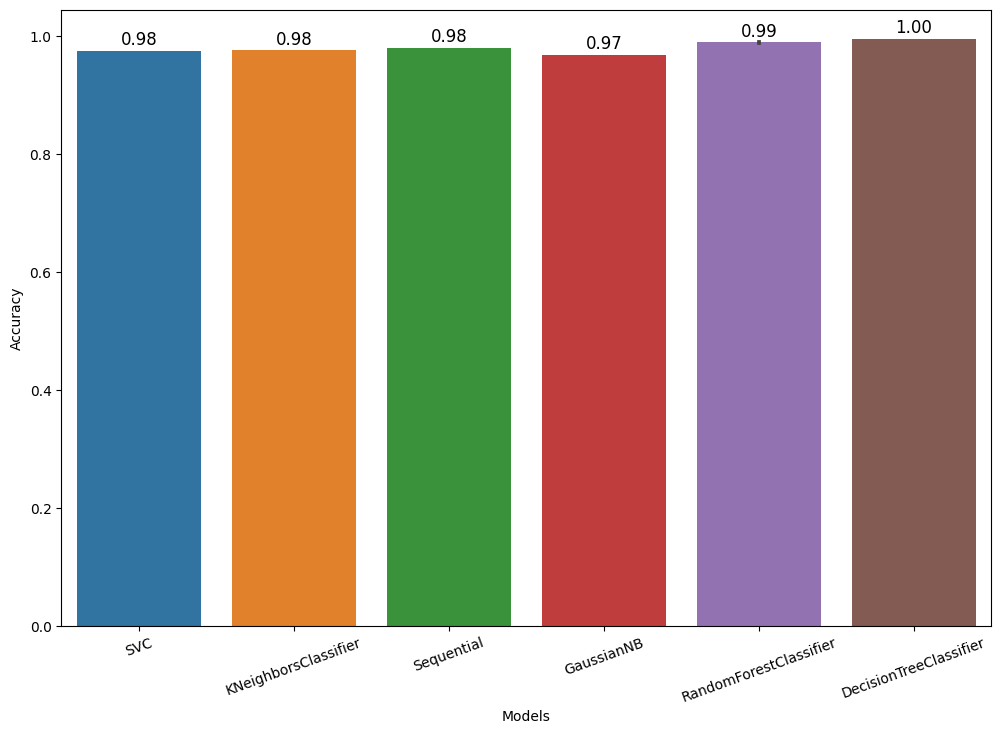

In [ ]:
# accuracy
modelName = pd.Series(model_name, name='Model').astype(str)
acc_score = pd.Series(accuracy, name='Accuracy')
output = pd.concat([modelName, acc_score],axis=1)

plt.figure(figsize=(12, 8))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);